In [18]:
# We want to predict the fair price of a used car

# # First we will import the dataset/dataframe
# Data can be in different format - url,xlsx, csv , json etc
#First we will import libraries
import pandas as pd
import numpy as np
# numpy is used for arrays and vectorized computations
# Pandas is used for data manipulation, data wrangling, cleaning and preprocessing
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filename,header=None)
df
# Here we defined the url as filename and dataframe as df . We omitted the header as none
# Then we called the csv file  using panda and called df
# The dataset has 205 rows/records with 26 col/attributes

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [19]:
# For first five records
print ("The first five recods are")
df.head(5)
# print has to be in lower case
#For tail is df.tail(5)
# Here we can see there are some missing values as ?

The first five recods are


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
# Here we do not have a header. So we have to create one
#Firstly, we create a list "headers" that include all column names in order. 
# Then, we use df.columns = headers to replace the headers by the list we created. 
# create headers list

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [21]:
# Then, we use df.columns = headers to replace the headers by the list we created. 
df.columns = headers
df
# It has missing data, categorial data mpg instead of kmL

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [22]:
# Save this file/dataset : df. to_csv/excel/json/sql("name.csv")
df.to_csv("automobile.csv",index=False)

In [23]:
# Basic Analysis
df.shape
# The df has 205 records with 26 attributes

(205, 26)

In [24]:
df.describe ()
# describe will only work on numeric data

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [25]:
# To get all description
df.describe (include='all')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [26]:
# Basic insight of data
print (df.dtypes)
# This will return the types of data we have. Look carefully if anything does not make sense
# If needed change the type

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [27]:
# Another way  to check the dataset is 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Change data type

In [ ]:
# Identify missing values
# Handling missing value 
#Correct data format


In [28]:
# Handling missing data
# Replace all ? to NaN. This is python missing default.
# For this we have to import numpy
df.replace("?", np.nan, inplace = True)
df.head(5)
# Here we will replace ? to NaN
# True stands for miising value< False stands for not missing value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Evaluating for Missing Data
# There are two methods to detect missing data:
# missing_data = df.isnull()
#missing_data = df.isnotnull()

In [29]:
#Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

NameError: name 'missing_data' is not defined

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

"normalized-losses": 41 missing data
"num-of-doors": 2 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data
"price": 4 missing data
we do not want to replace the value of price as it is the dependent variable but we can drop the records with null value


#### How to deal with missing data?

    drop data
    a. drop the whole row
    b. drop the whole column
    
    replace data
    a. replace it by mean- for numeric data
    b. replace it by frequency- for categorical data
    c. replace it based on other functions


Repalce by mean columns-- normalized-losses(41), stroke (4), bore(4), horsepower(2), peak-rpm(2)
Repalce by frequency  -- num of doors (2), 



In [30]:
# Calculate the avg of the column 
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
# first we defined avg function then print

Average of normalized-losses: 122.0


In [31]:
#Replace "NaN" by mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [32]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

Average of stroke: 3.2554228855721337


In [33]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)



Average of bore: 3.3297512437810957


In [34]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


Average horsepower: 104.25615763546799


In [35]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [36]:
# To replace the number of doors we need to find the frequency/mode
# First we do value counts
df['num-of-doors'].value_counts()
# four doors are more frequent

four    114
two      89
Name: num-of-doors, dtype: int64

In [37]:
#We can also use the ".idxmax()" method to calculate for us the most common type automatically:
df['num-of-doors'].value_counts().idxmax()

'four'

In [38]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [39]:
#Finally, let's drop all rows that do not have price data:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# axis=0 for row, axis =1 for dropping the column

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)


In [24]:
df.head(7)
# Now we got data with no missing values 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


#### Data Formatting

Correct data format
In Pandas, we use

.dtype() to check the data type

.astype() to change the data type



In [40]:
# First see the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [41]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [42]:
df.dtypes
# Now everything is in correct format

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [43]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


### Data Standardization : 
Data is usually collected from different agencies with different formats.
Standardization is the process of transforming data into a common 
format which allows the researcher to make the meaningful comparison. 
Example: NY, newyork to NY. In this case we will convert Transform mpg to L/100km:
The formula for unit conversion is

L/100km = 235 / mpg 




In [45]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()
# That added a new column as city lkm. we can drop the whole col if we want

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


#### Data Normalization

Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

Target:would like to Normalize those variables so their value ranges from 0 to 1.

Approach: replace original value by (original value)/(maximum value)


In [46]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()


In [47]:
# show the scaled columns
df[["length","width","height"]].head(10)


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
5,0.851994,0.920833,0.887960
6,0.925997,0.991667,0.931438
7,0.925997,0.991667,0.931438
8,0.925997,0.991667,0.934783
9,0.849592,0.900000,0.908027


In [48]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462


### Binning
Why binning?

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. 
In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. 
What if we only care about the price difference between cars with high horsepower, medium horsepower,
and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins 

In [49]:
# Since we are binning hp we have to convert the type to int from object
df["horsepower"]=df["horsepower"].astype(int, copy=True)

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

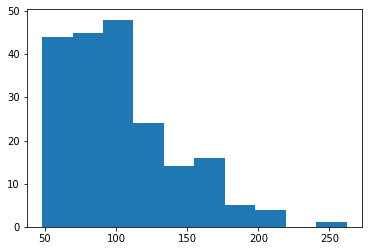

In [50]:
# We want to see the distribution after we applied binning. So we import matplotlib
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])
# we got the histragram of hp distribution

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

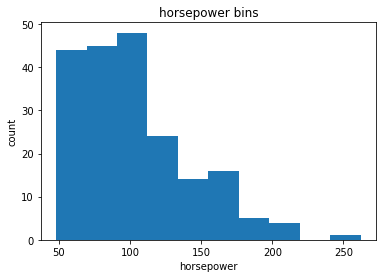

In [51]:
# But we are missing the labeling
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
#
plt.pyplot.hist(df["horsepower"])

In [65]:
# We want 3 equal size bandwith for binning
#We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).

Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.


In [52]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We need to set group names
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
#We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head()
#Lets see the number of vehicles in each bin.
df["horsepower-binned"].value_counts()

#Lets plot the distribution of each bin.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

#set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

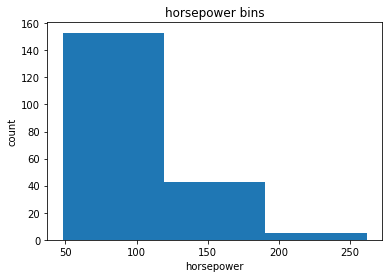

In [54]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

 ### Dummy(Indicator) variable

What is an indicator variable?

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?

So we can use categorical variables for regression analysis in the later modules. 


Example

We see the column "fuel-type" has two unique values, "gas" or "diesel".
Regression doesn't understand words, only numbers. 
To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [55]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km'],
      dtype='object')

In [57]:
#get indicator variables and assign it to data frame "dummy_variable_1" 
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()
#change column names for clarity 
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [58]:
# As we two columns we can concat/merge and delete the original column
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [59]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [60]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


In [42]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,11.190476,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,11.190476,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,12.368421,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,9.791667,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,13.055556,0,1,1,0


In [61]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

In [62]:
#Save the new csv 
df.to_csv('clean_df.csv')

### Descriptive Statistical Analysis of clean dataset

In [63]:
df.describe (include='all')
# To see all summary

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000


In [64]:
df.describe()
# Summary of numeric variables

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [65]:
df.describe(include=['object'])
#Summary of categorial variables

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


###### Value Counts

Value-counts is a good way of understanding how many units of each characteristic/variable we have.
Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. 
As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [66]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [67]:
# We can convert the series to a Dataframe as follows :

df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [68]:
# Let's repeat the above steps but save the results to the dataframe 
#"drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

# drive_wheels_counts as variable
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head(10)

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


drive wheels counts can be a good predictor as it is distributed almost evenly except for the 4wd

In [69]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.


##### Analyzing Individual Feature Patterns using Visualization
Visualization is very important in data science, and Python visualization packages provide great freedom.

In [71]:
# To install seaborn we use the pip which is the python package manager
%%capture
! pip install seaborn
# Import visualization packages "Matplotlib" and "Seaborn", 
# don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

UsageError: Line magic function `%%capture` not found.


How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. 
This will help us find the right visualization method for that variable.
For example, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":



In [72]:
# list the data types for each column
print(df.dtypes)
#For example, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":


symboling              int64
normalized-losses      int32
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
fuel-type-diesel       uint8
fuel-type-gas          uint8
aspiration-std         uint8
aspiration-turbo       uint8
dtype: object


#### Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. 
Determining correlation is much simpler the determining causation as causation may require independent experimentation.

 #### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

    1: Total positive linear correlation.
    0: No linear correlation, the two variables most likely do not affect each other.
    -1: Total negative linear correlation.
    
sometimes we would like to know the significant of the correlation estimate.

 

In [73]:
# df.corr()- is python default to find corr
# Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


#### Continuous numerical variables visualization- scatterplots

Continuous numerical variables are variables that may contain any value within some range. 
Continuous numerical variables can have the type "int64" or "float64". 
A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price.
We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.


The coorelation between the dependent and independent variable can be strong/weak; +ve/-ve ; linear/non linear in nature

In [74]:
# we find the corr between engine size and price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The corr between price and engine size is 0.87 which signifies there is a +ve relationship between them.
If engine size increases by 1 unit  the price goes up by 0.87 unit, other factors remaining constant


<AxesSubplot:xlabel='engine-size', ylabel='price'>

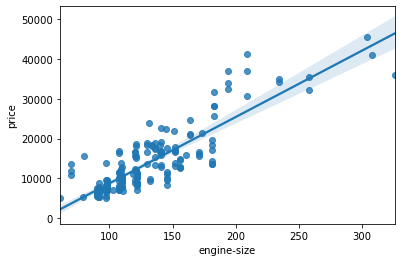

In [76]:
# Let's find the scatterplot of "engine-size" and "price"

# Engine size as potential predictor variable of price
# First we call regression plot and define x,y
import seaborn as sns
sns.regplot(x="engine-size", y="price", data=df)
# plt.ylim(0,)


Let's look for some more relationships like highway milage, peak rpm, stroke  on price

In [77]:
df[['highway-mpg', 'price']].corr()
# As the highway-mpg goes up, the price goes down: 
#this indicates an inverse/negative relationship between these two variables. 
#Highway mpg could potentially be a predictor of price.


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

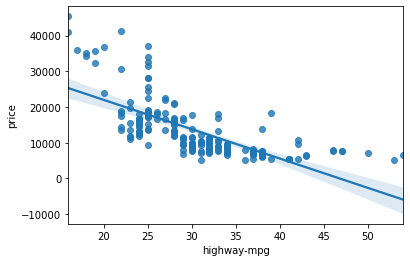

In [78]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [80]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

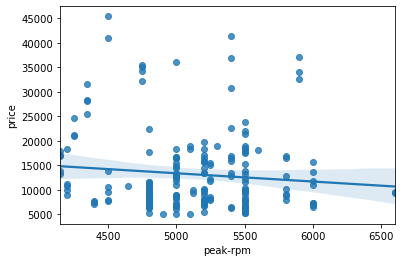

In [79]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [81]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


The correlation is 0.0823, the non-diagonal elements of the table.

<AxesSubplot:xlabel='stroke', ylabel='price'>

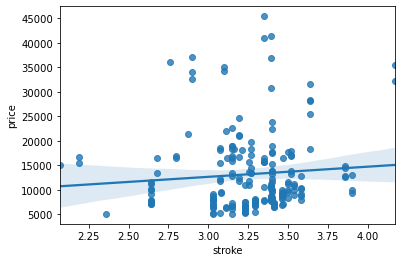

In [82]:
sns.regplot(x="stroke", y="price", data=df)

#### P-value:

The P-value is the probability value that the correlation between these two variables is statistically significant. 
Normally, we choose a significance level of 0.05, 
which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is <
0.001: we say there is strong evidence that the correlation is significant.

the p-value is <
0.05: there is moderate evidence that the correlation is significant.

the p-value is <
0.1: there is weak evidence that the correlation is significant.

the p-value is >
0.1: there is no evidence that the correlation is significant.


In [84]:
# We can obtain this information using "stats" module in the "scipy" library.

from scipy import stats

# Let us find the correlation between wheel-base and price
df[["wheel-base","price"]].corr()



,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


The correlation is 0.58, means there is a positive (weak) relationship between wheel-base and price.

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

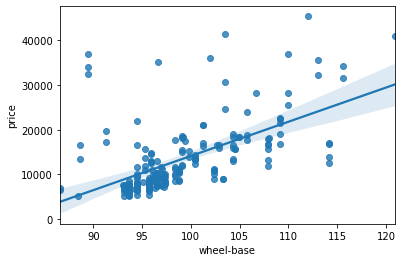

In [85]:
# Visualization
sns.regplot(x="wheel-base", y="price", data=df)

In [86]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, 
although the linear relationship isn't extremely strong (~0.585)

In [87]:
# Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270650862e-48


Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, 
and the linear relationship is quite strong (~0.809, close to 1)

In [88]:
# Length vs Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158188e-30


Since the p-value is < 0.001, the correlation between length and price is statistically significant, 
and the linear relationship is moderately strong (~0.691).

In [89]:
# Width vs Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant,
and the linear relationship is quite strong (~0.751).

In [90]:
# Curb-weight vs Price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8344145257702849  with a P-value of P =  2.1895772388933803e-53


Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, 
and the linear relationship is quite strong (~0.834).

In [91]:
# Engine-size vs Price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, 
and the linear relationship is very strong (~0.872).

In [92]:
# Bore vs Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626606  with a P-value of P =   8.049189483935032e-17


Since the p-value is <0.001, the correlation between bore and price is statistically significant, 
but the linear relationship is only moderate (~0.521).

In [93]:
# City-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844681  with a P-value of P =  2.3211320655673773e-29


Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, 
and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

In [94]:
# Highway-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474617e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, 
and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

#### Categorical variables visualization - boxplot
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

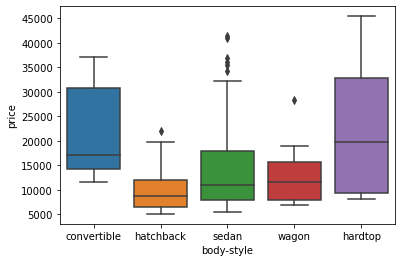

In [95]:
# Let's look at the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, 
and so body-style would not be a good predictor of price

<AxesSubplot:xlabel='engine-location', ylabel='price'>

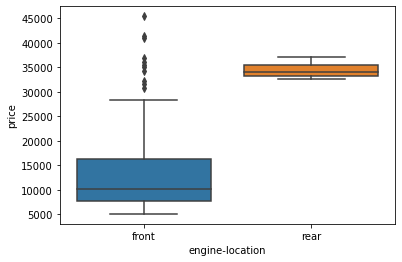

In [96]:
#Let's examine engine "engine-location" and "price":
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, 
are distinct enough to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

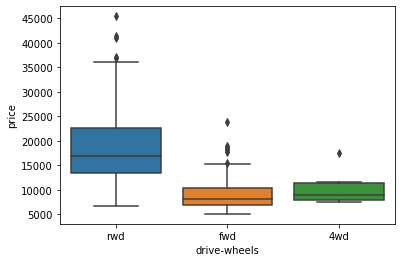

In [97]:
# Let's examine "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)


Here we see that the distribution of price between the different drive-wheels categories differs; 
as such drive-wheels could potentially be a predictor of price.

###  Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables 
and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.


In [98]:
df['drive-wheels'].unique()


array(['rwd', 'fwd', '4wd'], dtype=object)

In [99]:
#If we want to know, on average, which type of drive wheel is most valuable, 
# we can group "drive-wheels" and then average them.
# grouping results
df_group_one = df[['drive-wheels','body-style','price']]
# Here We selected the columns 'drive-wheels', 'body-style' and 'price', 
# then assign it to the variable "df_group_one"

In [100]:
# grouping results (drive wheels only)
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, 
while 4-wheel and front-wheel are approximately the same in price.

In [ ]:
# grouping results (body style only)
# df_group_one = df_group_one.groupby(['price'],as_index=False).mean()
# df_group_one
# Not working

In [101]:
#grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [106]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Here rwd and hatchback type cars are expensive.

This grouped data is much easier to visualize when it is made into a pivot table. 
A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. 
We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In [107]:
#In this case, we will leave the drive-wheel variable as the rows of the table,
# and pivot body-style to become the columns of the table:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. 
We can fill these missing cells with the value 0, but any other value could potentially be used as well. 
It should be mentioned that missing data is quite a complex subject and is an entire course on its own

In [108]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### heat map 
The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

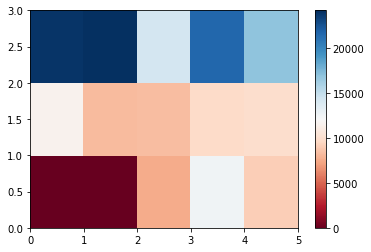

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

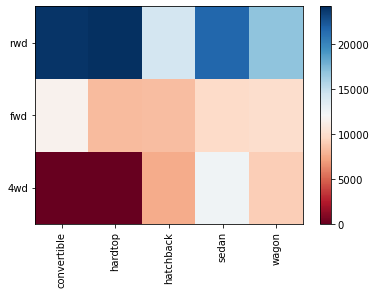

In [111]:
#The default labels convey no useful information to us. Let's change that:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### ANOVA: Analysis of Variance ????
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
For more information : https://www.reneshbedre.com/blog/anova.html

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [ ]:
# Let's see if different types 'drive-wheels' impact 'price', we group the data.


In [112]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)
df_gptest
grouped_test2.get_group('4wd')['price']
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [113]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [114]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### Conclusion : Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore

Categorical variables:

    Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.


## Model Development

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Model/Estimator is a mathmatical equation to predict a given value from one/more given values.

Some questions we want to ask in this module

    do I know if the dealer is offering fair value for my trade-in?
    do I know if I put a fair value on my car?

Data Analytics, we often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.
There are many ways to estimate/predict the outcome. Here we will use
1. Linear regression- simple/multiple
2. Polynomial regression and pipelines
3. Model using decision tree

In [115]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# load data and store in dataframe df:
# Our dataset is already loades and cleaned


#### Linear Regression

One example of a Data Model that we will be using is
Simple Linear Regression.

Simple Linear Regression is a method to help us understand the relationship between two variables:

    The predictor/independent variable (X)
    The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

𝑌:Dependent (𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒)     X:Independent (𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟) 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

Linear function:            𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

    a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
    b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit



In [ ]:
# Steps 
# Set of points-->fit the model-->parameters--->regress--->estimator


In [120]:
# import library
from sklearn.linear_model import LinearRegression

#Create the linear regression object
# We will find out how highway mpg can predict price of the car using simple LR
lm = LinearRegression()
lm
# Let us define the variables
X = df[['highway-mpg']]
Y = df['price']
# Fit/train the model
lm.fit(X,Y)
# Predict the output
Yhat = lm.predict(X)
Yhat[0:5]
# That returns an array of five predicted prices 


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [121]:
# Value of intercept(b0) and coefficient(b1)
lm.intercept_

38423.305858157386

In [122]:
lm.coef_

array([-821.73337832])

The final estimated linear model  is 
price = 38423.31 - 821.73 x highway-mpg
The relationship sifnifies
1. The value of price is 38423 when the mpg is 0
2. The value of price decreases by 821 unit when mpg increases by 1 unit

In [123]:
# Let us practice few more models 
# Price and engine size
lm1 = LinearRegression()
lm1
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)
# Slope 
lm1.coef_
# Intercept
lm1.intercept_
print ( "The slope of the model is", lm1.coef_, " with intercept ", lm1.intercept_ )

The slope of the model is [166.86001569]  with intercept  -7963.338906281046


The final estimated linear model  is 
price = -7963.33 + 166.87 x engine-size



#### Multiple Linear Regression
We want to predict car price using more than one variable. We can use Multiple Linear Regression.
The equation is given by     𝑌ℎ𝑎𝑡=b0+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
From the previous section we know that other good predictors of price could be:

    Horsepower
    Curb-weight
    Engine-size
    Highway-mpg

Let's develop a model using these variables as the predictor variables. 

In [125]:
# Practice 1
# Define all independent variable as z
Z = df[[ 'curb-weight', 'engine-size', 'highway-mpg']]
# Fit the linear model using the four above-mentioned variables
lm.fit(Z, df['price'])
# Intercept(b0) and coeficient(b1..b4)
lm.intercept_
lm.coef_
print ( "The slope/coefficient of the model is", lm.coef_, " with intercept ", lm.intercept_ )

The slope/coefficient of the model is [   3.89932261  111.9726602  -122.58282166]  with intercept  -7203.19437901468


The Final Model is
Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 
         81.95906216 x engine-size +33.58258185 x highway-mpg


#Pratice 2
lm2=LinearRegression
lm2
X = df['normalized-losses' , 'highway-mpg'] # we can use Z as well
Y = df['price']
lm2.fit[X,Y]



In [126]:
# we can define the way above or below
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])
lm.intercept_
lm.coef_
print ( "The slope/coefficient of the model is", lm2.coef_, " with intercept ", lm2.intercept_ )

The slope/coefficient of the model is [   1.49789586 -820.45434016]  with intercept  38201.313272457286


The Final Model is
Price = 38201.313272457286 + 1.49789586 x normalized-losses - 820.45434016 x highway-mpg

### Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

1. Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).




(0.0, 48170.301416875096)

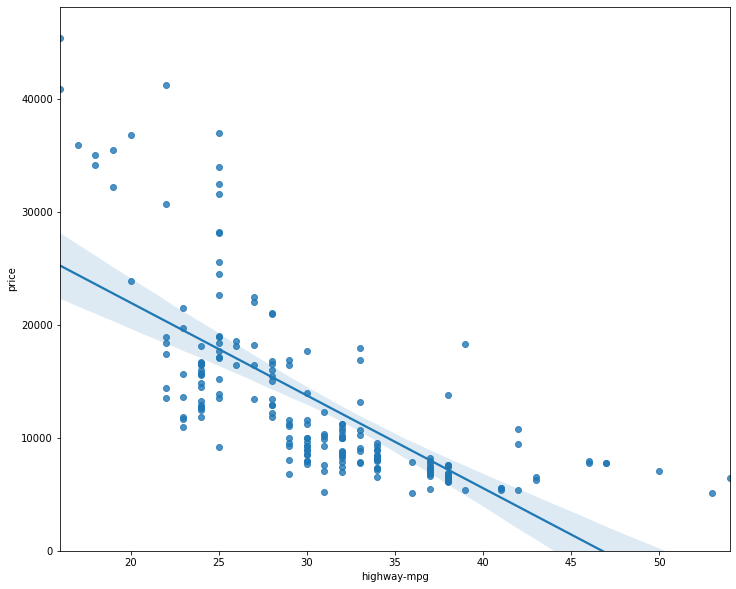

In [130]:
# we have aleady built a predictor LR model before
#Practice 1
#Let's visualize highway-mpg as potential predictor variable of price
# import the visualization package: seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. 
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points 
are around the regression line. 
This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. 
If the data is too far off from the line, this linear model might not be the best model for this data.
In this case, it semms the data points are too scattered around 25 mpg and two many outlier points as well

(0.0, 47414.1)

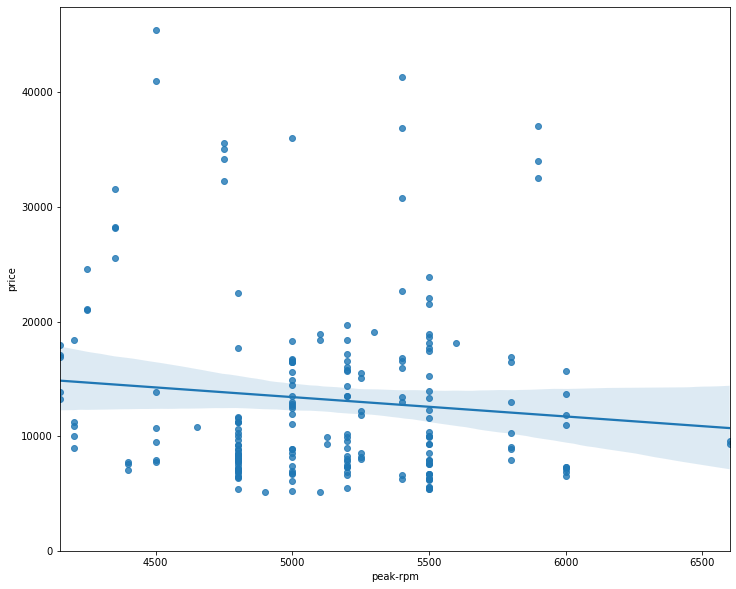

In [131]:
# Pracice 2
# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

In [132]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot for simple LR

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


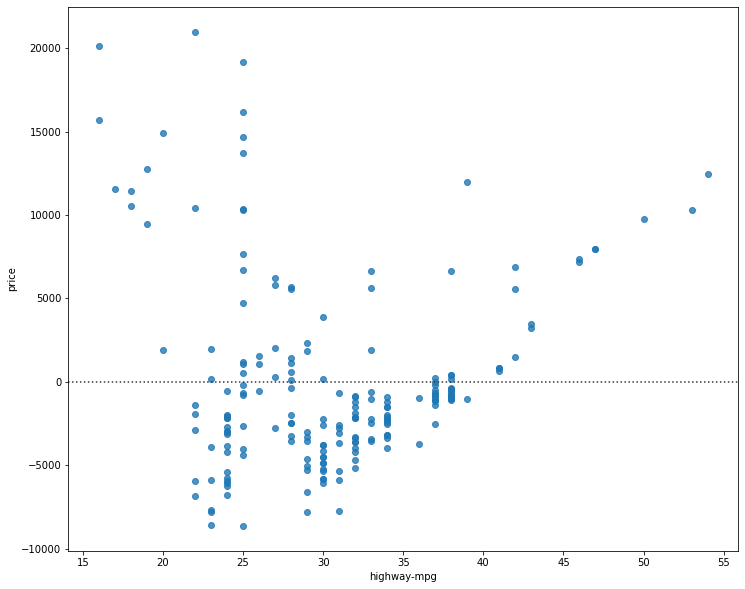

In [133]:
# Let us check the residual plot of highway-mapg and price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

- We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

##### Distribution Plot for MLR
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


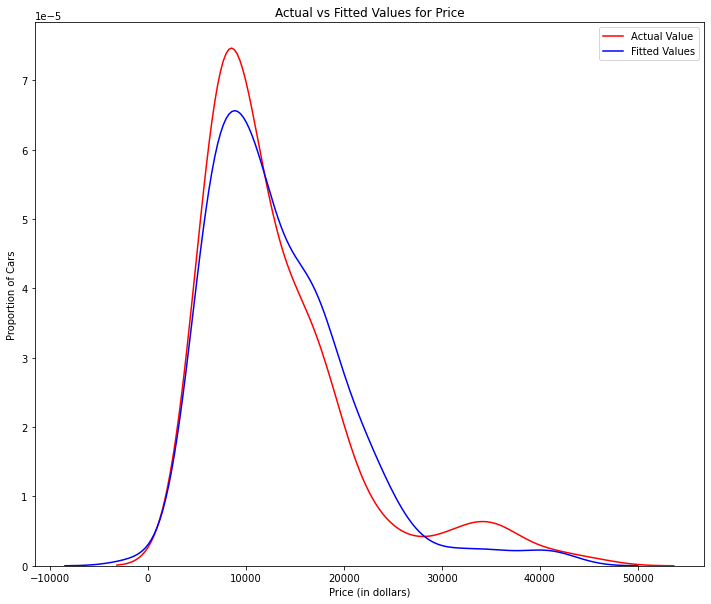

In [134]:
# Here Z = df[[ 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Polynomial Regression and Pipelines

- Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd order
- 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
Cubic - 3rd order
- 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
Higher order:
- 𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.


In [136]:
# We will use the following function to plot the data:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ HighwayMPG')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [137]:
# Lets get the variables (Single vaiant)
x = df['highway-mpg']
y = df['price']
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3) # 3 for 3rd degree
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


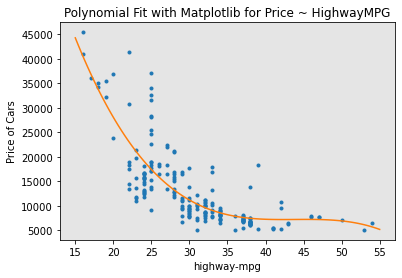

In [111]:
# Let's plot the function 
PlotPolly(p, x, y, 'highway-mpg')

In [138]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

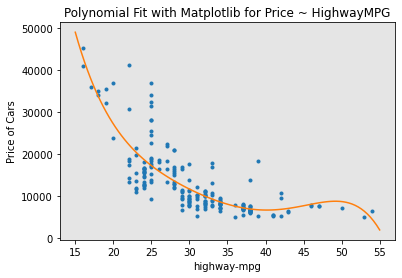

In [139]:
# Let us check for 5th degree
f = np.polyfit(x, y, 5) 
p = np.poly1d(f)
PlotPolly(p, x, y, 'highway-mpg')
# Here we can see 5th order fits the data more

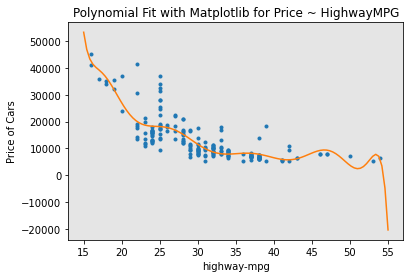

In [140]:
# Check for 11th order
f = np.polyfit(x, y, 11) 
p = np.poly1d(f)
PlotPolly(p, x, y, 'highway-mpg')

The higher order we go the better it fits. But sometimes it can get overfitted or even underfitted. We will discuss this isuues later

#### multivariate polynomial function

In [141]:
# import the module
from sklearn.preprocessing import PolynomialFeatures
#We create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr
# Fit the model and transform
Z_pr=pr.fit_transform(Z)



In [142]:
Z.shape # the original data has 201 samples with thrree features

(201, 3)

In [143]:
Z_pr.shape # after the transformation, there 201 samples and 10 features

(201, 10)

 #### Data Pipeline
    Data Pipelines simplify the steps of processing the data. 
    We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

    

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#We create the pipeline, by creating a list of tuples including the name of the model 
# or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
#we input the list as an argument to the pipeline constructor 
pipe=Pipeline(Input)
pipe
# We can normalize the data, perform a transform and fit the model simultaneously. 
pipe.fit(Z,y)
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([14027.83226625, 14027.83226625, 17028.85829254, 10153.70615236])

- So first crated the pipeline, transformed the function to fit the model and then predicted the model

In [149]:
# Let us practice with 10 predictes value of the model
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13978.98928016, 13978.98928016, 17637.28434484, 10437.05787959,
       16339.95239087, 14736.11865758, 16050.19037813, 16479.11586556,
       17046.87725777, 10673.8287526 ])

#### Quantitative Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)

- R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

- Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).


- Measures for simple linear regeession using highway mpg

In [150]:
# R^2 
#highway_mpg_fit
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "highway-mpg".
R square close to 1 is agood fit.

In [151]:
# MSE
# Import Libraries
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [152]:
# Predict the estimator
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


- Measures for MLR- Multiple Linear Regression

In [153]:
#Let's calculate the R^2
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.7965223866823608


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


In [154]:
# Let's calculate the MSE
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  12786870.010381931


- Measures for polynomial fit



In [155]:
# Let's calculate the R^2
#let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score
#We apply the function to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.7023769092452208


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [156]:
#We can also calculate the MSE: 
mean_squared_error(df['price'], p(x))

18703127.639051963

####  Prediction and Decision Making

- Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [158]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# Create a new input 
new_input=np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model
lm.fit(X, Y)
lm

# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

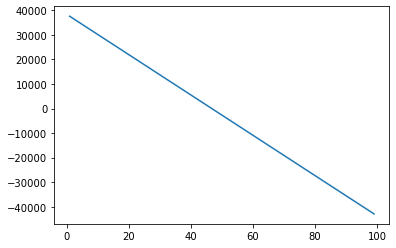

In [159]:
# we can plot the data 
plt.plot(new_input, yhat)
plt.show()
plt.close()

#### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

    What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

    What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.
Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.49659118843391759
    MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    R-squared: 0.80896354913783497
    MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.6741946663906514
    MSE: 2.05 x 10^7

Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

    MSE : The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
    R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.
Simple Linear Model (SLR) vs Polynomial Fit

    MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
    R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.
Multiple Linear Regression (MLR) vs Polynomial Fit

    MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
    R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.



- Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

## Model Evaluation and Refinement

We already have clean data, we have some predicted models. 

- Functions for ploting data
%%capture
! pip install ipywidgets

from ipywidgets import interact, interactive, fixed, interact_manual

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
    
    
    
    def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [160]:
%%capture
! pip install ipywidgets
# For interactive interface
from ipywidgets import interact, interactive, fixed, interact_manual

In [161]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [162]:
# Define PollyPlot
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [163]:
# First we wiil work with numeric data
df=df._get_numeric_data()
df.head(10)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111,5000.0,21,27,13495.0,11.190476,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111,5000.0,21,27,16500.0,11.190476,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,154,5000.0,19,26,16500.0,12.368421,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,102,5500.0,24,30,13950.0,9.791667,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,115,5500.0,18,22,17450.0,13.055556,0,1,1,0
5,2,122,99.8,0.851994,0.920833,0.887960,2507,136,3.19,3.40,...,110,5500.0,19,25,15250.0,12.368421,0,1,1,0
6,1,158,105.8,0.925997,0.991667,0.931438,2844,136,3.19,3.40,...,110,5500.0,19,25,17710.0,12.368421,0,1,1,0
7,1,122,105.8,0.925997,0.991667,0.931438,2954,136,3.19,3.40,...,110,5500.0,19,25,18920.0,12.368421,0,1,1,0
8,1,158,105.8,0.925997,0.991667,0.934783,3086,131,3.13,3.40,...,140,5500.0,17,20,23875.0,13.823529,0,1,0,1
9,2,192,101.2,0.849592,0.900000,0.908027,2395,108,3.50,2.80,...,101,5800.0,23,29,16430.0,10.217391,0,1,1,0


#### Training and Testing
An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y

In [201]:
y_data = df['price']
# Now we will drop price column as it is the dependent variable
x_data=df.drop('price',axis=1)
# Now we randomly split our data into training and testing data using the function train_test_split. 

# we will import the library

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) 
# we are using 10% data as for testing


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [170]:
# Let's import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression

# We create a Linear Regression object
lre=LinearRegression()

# Fit the model
lre.fit(x_train[['highway-mpg']], y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression()

In [171]:
# Let's Calculate the R^2 on the test data:
lre.score(x_test[['highway-mpg']], y_test)

-0.02688896960469922

In [172]:
# Let's Calculate the R^2 on the train data:
lre.score(x_train[['highway-mpg']], y_train)

0.5083627320666815

- we can see the R^2 is much smaller using the train data.

In [173]:
# Let us use 40 percent data as test data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['highway-mpg']],y_train1)
lre.score(x_test1[['highway-mpg']],y_test1)

0.48301138227946017

In [174]:
lre.score(x_train1[['highway-mpg']], y_train1)

0.4934016641097354

- 40% test data is showing better performance in terms of R^2 values

#### Cross-validation Score
Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's go over several methods that you can use for Cross-validation. 

In [176]:
#Lets import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score
# We input the object, the feature in this case ' highway-mpg', the target data (y_data). 
# The parameter 'cv' determines the number of folds; in this case 4. 
Rcross = cross_val_score(lre, x_data[['highway-mpg']], y_data, cv=4)
#The default scoring is R^2; each element in the array has the average R^2 value in the fold:
Rcross

array([0.56273923, 0.50617506, 0.36024954, 0.123501  ])

In [177]:
# We can calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3881662072564622 and the standard deviation is 0.1697268682335954


In [178]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.???
-1 * cross_val_score(lre,x_data[['highway-mpg']], y_data,cv=4,scoring='neg_mean_squared_error')

array([39295713.70380161, 44741370.23768637, 31815771.02184274,
       16175859.8343302 ])

In [179]:
# Let's practice using 2 folds
Rc=cross_val_score(lre,x_data[['highway-mpg']], y_data,cv=2)
Rc.mean()

0.3689378324027451

- You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold for testing and the other folds are used for training. 

In [180]:
# import the function
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['highway-mpg']], y_data,cv=4)
yhat[0:5]

array([15702.62111965, 15702.62111965, 16477.14151726, 13379.05992683,
       19575.22310768])

#### Overfitting, Underfitting and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [182]:
# Let's create Multiple linear regression objects and train the model 
# using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features
lr = LinearRegression()
lr.fit(x_train[['length', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Prediction using training data
yhat_train = lr.predict(x_train[['length', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]


array([ 8148.05174928, 27559.23067675, 15214.01206449,  3663.60302116,
       35270.64823603])

In [183]:
# Prediction using test data
yhat_test = lr.predict(x_test[['length', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11133.56762442,  5964.2157454 , 12020.48744504,  6995.65093863,
       15585.0689409 ])

#### model evaluation using our training and testing data

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


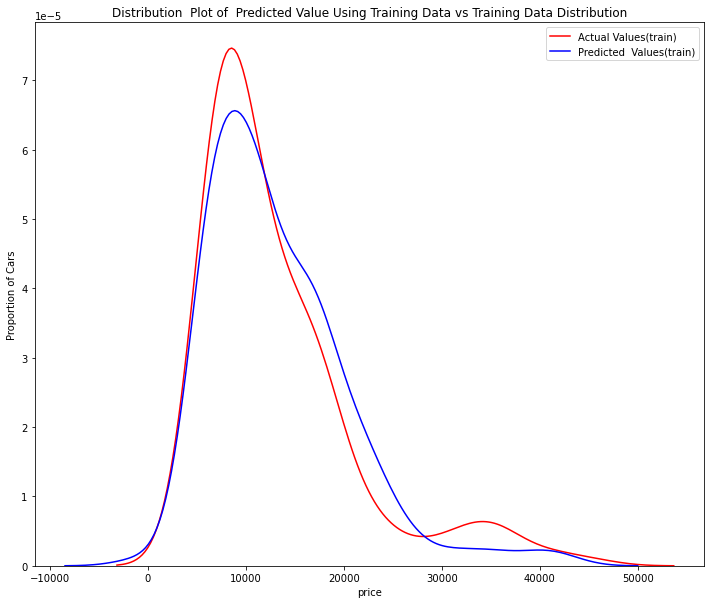

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Let's examine the distribution of the predicted values of the training data

plt.figure(figsize=(width, height))

plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Values(train)")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted  Values(train)" , ax=ax1)
plt.legend()
plt.show()
plt.close()

- So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Figure size 864x720 with 0 Axes>

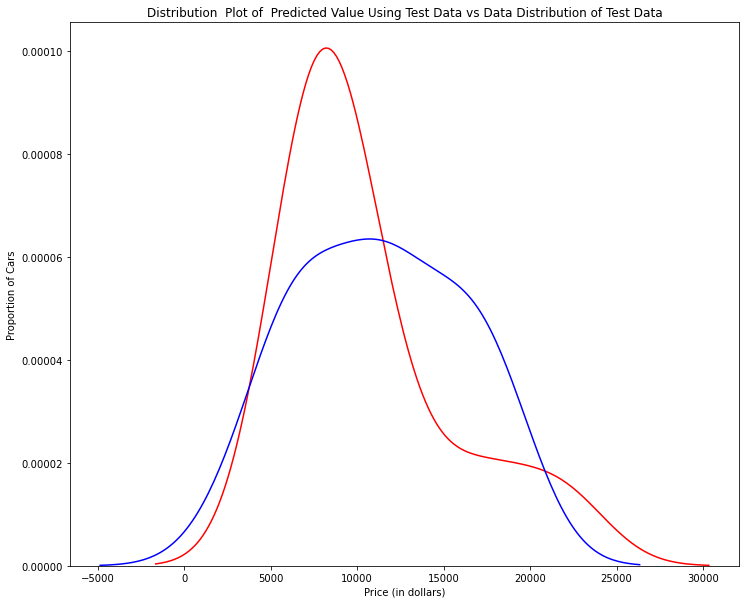

the red line is for actual test values and the blue one is the predicted test values


In [189]:
# Let's examine the distribution of the predicted values of the test data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(width, height))


Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# plt.legend()--this command is not working here

plt.show()
plt.close()
print ('the red line is for actual test values and the blue one is the predicted test values')

# having problem to set the right graps ?????

- the red line is for actual test values and the blue one is the predicted test values

- Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different

#### Overfitting
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. 


###### Univariate polynomial function fitting- overfitting

In [191]:
# Let's create a degree 5 polynomial model.
# Let's use 55 percent of the data for training and the rest for testing
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['highway-mpg']])
pr

PolynomialFeatures(degree=5)

In [192]:
# let's create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6511.57114501,  8993.37100965, 16751.57368263, 21757.02721221,
       18214.09030629])

In [193]:
#Let's take the first five predicted values and compare it to the actual target
print("Predicted values:", yhat[0:5])
print("True values:", y_test[0:5].values)

Predicted values: [ 6511.57114501  8993.37100965 16751.57368263 21757.02721221
 18214.09030629]
True values: [ 6295. 10698. 13860. 13499. 15750.]


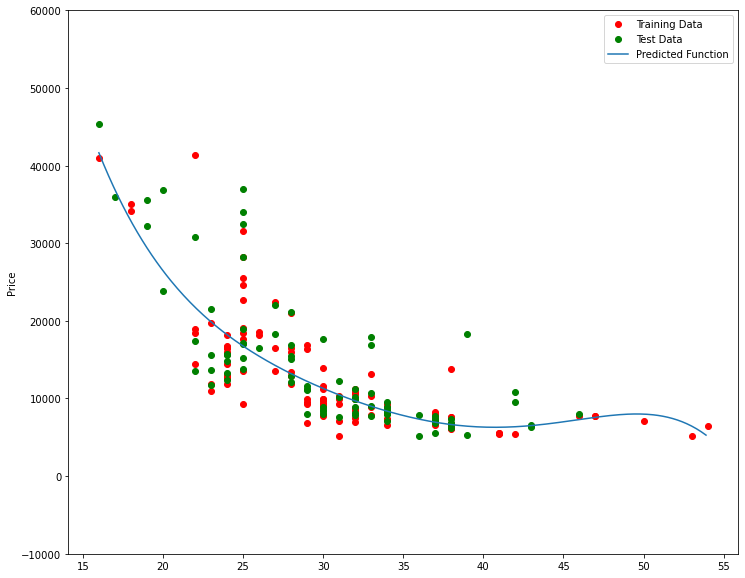

In [194]:
# We will use the function "PollyPlot" that we defined at the beginning of the lab to display 
# the training data, testing data, and the predicted function.
PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train, y_test, poly,pr)

- The polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction

- At 5th degree the estimated function appears to track the data very good.

In [195]:
# Let's check for 11th order and then 20th order
pr = PolynomialFeatures(degree=11)
x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['highway-mpg']])
pr

PolynomialFeatures(degree=11)

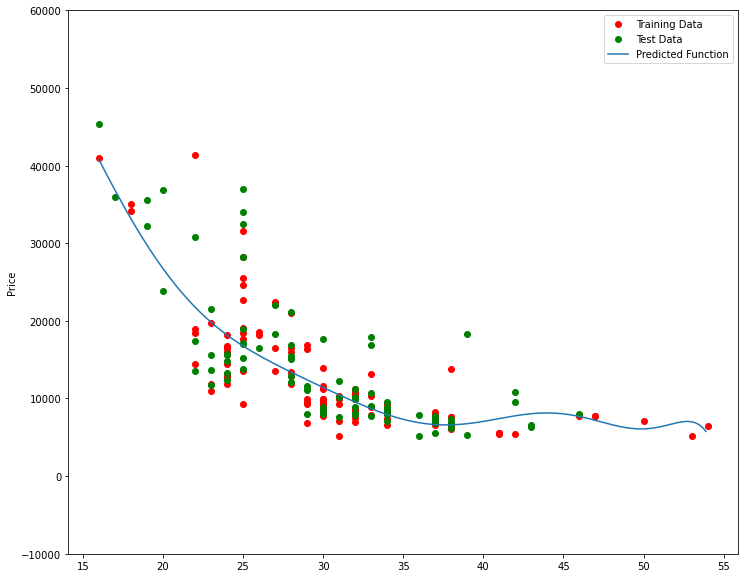

In [196]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]
PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train, y_test, poly,pr)

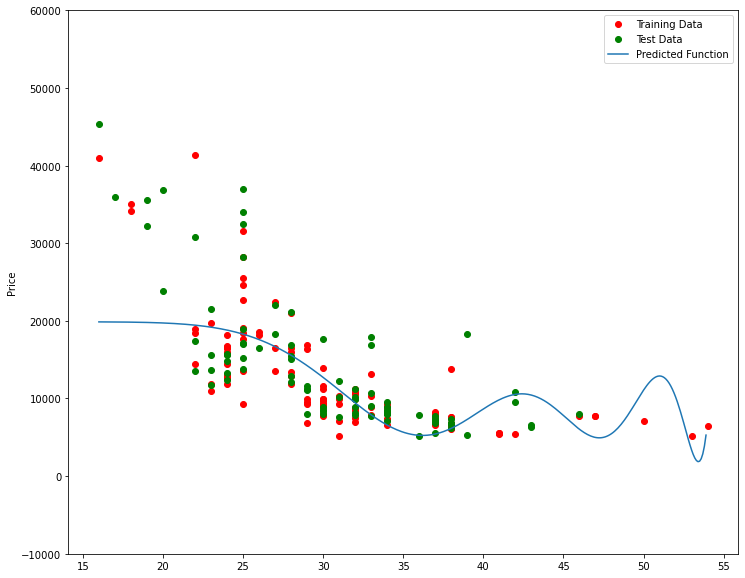

In [197]:
pr = PolynomialFeatures(degree=20)
x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['highway-mpg']])
pr
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]
PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train, y_test, poly,pr)

- 11th order does very good but 20th order did not do good around 40-50 mpg. This is an example of overfitting

In [198]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.49596883970465033

In [199]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

0.46760941866758243

- The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

In [200]:
# Interactive interface
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
    x_test_pr = pr.fit_transform(x_test[['highway-mpg']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['highway-mpg']], x_test[['highway-mpg']], y_train,y_test, poly, pr)

   

In [203]:
# The following interface allows you to experiment with different polynomial orders 
#and different amounts of data
interact(f, order=(0, 25, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=12, description='order', max=25), FloatSlider(value=0.45, description='t…

<function __main__.f(order, test_data)>

In [ ]:
# Let's see how the R^2 changes on the test data for different order polynomials and plot the results

Text(3, 0.75, 'Maximum R^2 ')

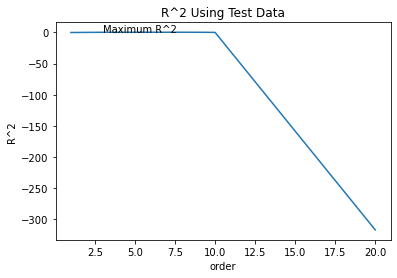

In [204]:
Rsqu_test = []

order = [1, 2, 3, 4,5, 6, 7, 8, 9,10, 20]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['highway-mpg']])
    
    x_test_pr = pr.fit_transform(x_test[['highway-mpg']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

- We see the R^2 gradually increases until an order 10th polynomial is used. Then the R^2 dramatically decreases at 11.

###### Multivariate polynomial function fitting- overfitting

In [206]:
pr1=PolynomialFeatures(degree=2)

# define the data 
x_train_pr1=pr1.fit_transform(x_train[[ 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[[ 'curb-weight', 'engine-size', 'highway-mpg']])

In [207]:
# Attributes of the function
x_train_pr1.shape

(180, 10)

In [208]:
# Fit the model
poly1=LinearRegression().fit(x_train_pr1,y_train)

In [209]:
#Predict the model
yhat_test1=poly1.predict(x_test_pr1)


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


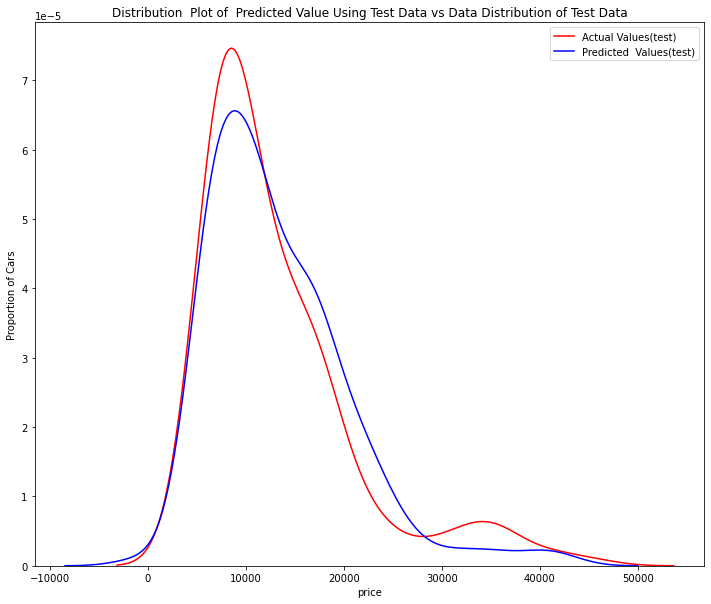

In [210]:
# Use the distribution plot 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(width, height))

plt.title('Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Values(test)")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted  Values(test)" , ax=ax1)




plt.legend()
plt.show()
plt.close()

- The predicted value is higher than actual value for cars where the price 10,000 range. conversely the predicted price is lower than the price cost in the $30,000  to $40,000 range. As such the model is not as accurate in these ranges.

### Ridge regression
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

- Ridge Regression vs. Least Squares

Least squares regression isn’t defined at all when the number of predictors exceeds the number of observations; It doesn’t differentiate “important” from “less-important” predictors in a model, so it includes all of them. This leads to overfitting a model and failure to find unique solutions. Least squares also has issues dealing with multicollinearity in data. Ridge regression avoids all of these problems. It works in part because it doesn’t require unbiased estimators; While least squares produces unbiased estimates, variances can be so large that they may be wholly inaccurate. Ridge regression adds just enough bias to make the estimates reasonably reliable approximations to true population values. 

-  In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.




In [214]:
# Let's perform a degree two polynomial transformation on our data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[[ 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[[ 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

# Let's import Ridge from the module linear models.
from sklearn.linear_model import Ridge

#Let's create a Ridge regression object, setting the regularization parameter to 0.1 
RigeModel=Ridge(alpha=0.1)

# Like regular regression, you can fit the model using the method fit
RigeModel.fit(x_train_pr, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.00252e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [216]:
# Obtain the prediction
yhat = RigeModel.predict(x_test_pr)
yhat

array([ 9609.83740231,  6486.90097   , 10579.63194543,  4753.28226337,
       15070.51660652,  5928.7930101 , 20051.11730028, 11748.54137231,
       18309.5914021 ,  5929.05839051,  9083.24287449,  5764.59448332,
       15077.35679944, 14737.3585295 , 11765.69387061, 17337.60730096,
        7924.43428633, 18879.446122  ,  6644.34701621,  9454.91235857,
        8514.15247727])

In [217]:
#Let's compare the first five predicted samples to our test set 
print('predicted:', yhat[0:5])
print('test set :', y_test[0:5].values)

predicted: [ 9609.83740231  6486.90097    10579.63194543  4753.28226337
 15070.51660652]
test set : [ 9549.  6229. 10245.  7295.  9989.]


In [218]:
#We select the value of Alpha that minimizes the test error, for example, we can use a for loop.
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

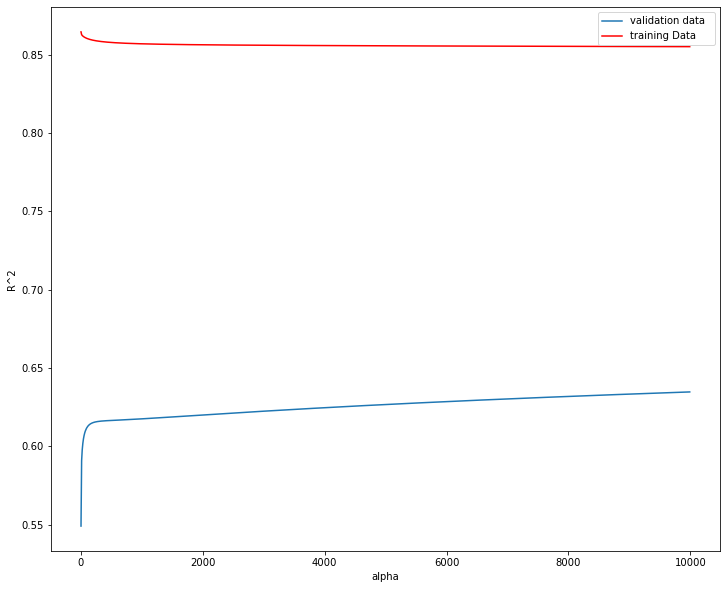

In [218]:
# We can plot out the value of R^2 for different Alphas 
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


- The red line represents the R^2 of the training data.  
As Alpha increases the R^2 decreases.  
Therefore as Alpha increases the model performs worse on the training data.  

- The blue line represents the R^2 on the validation data.  
As the value for Alpha increases the R^2 increases and converges at a point  

In [219]:
# Practice Ridge regression when alpha is set to 10 ????
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5710640373206048

#### Grid search ?????
The term Alfa is a hyperparameter ???, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.


In [221]:
#Let's import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

#We create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1


[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [223]:
#Create a ridge regions object
RR=Ridge()
RR

# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fit the model 
Grid1.fit(x_data[[ 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

- The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows
BestRR=Grid1.best_estimator_
BestRR

In [224]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000)

In [225]:
BestRR.score(x_test[[ 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6430504126335327

- Practice : Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [226]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_


Ridge(alpha=0.1, normalize=True)

####  Model prediction with decision tree



In [227]:
import pandas as pd
df.shape

(201, 21)

In [228]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [229]:
df.describe(include='all')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [231]:
df.values

array([[  3. , 122. ,  88.6, ...,   1. ,   1. ,   0. ],
       [  3. , 122. ,  88.6, ...,   1. ,   1. ,   0. ],
       [  1. , 122. ,  94.5, ...,   1. ,   1. ,   0. ],
       ...,
       [ -1. ,  95. , 109.1, ...,   1. ,   1. ,   0. ],
       [ -1. ,  95. , 109.1, ...,   0. ,   0. ,   1. ],
       [ -1. ,  95. , 109.1, ...,   1. ,   0. ,   1. ]])

In [232]:
# The data is already cleaned
# Build a model (decision tree)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# here we are using the decision tree algo to predict. we could also regress

In [233]:
# fit the model
model.fit(X,Y)

DecisionTreeClassifier()